# Visualizing Graph Traversals (BFS & DFS)

This notebook demonstrates **Breadth-First Search (BFS)** and **Depth-First Search (DFS)** on a sample graph.
We visualize each algorithm by coloring nodes according to traversal order or layer.


## 1. Setup & Sample Graph

We create an undirected graph with 7 nodes and visualize its structure.

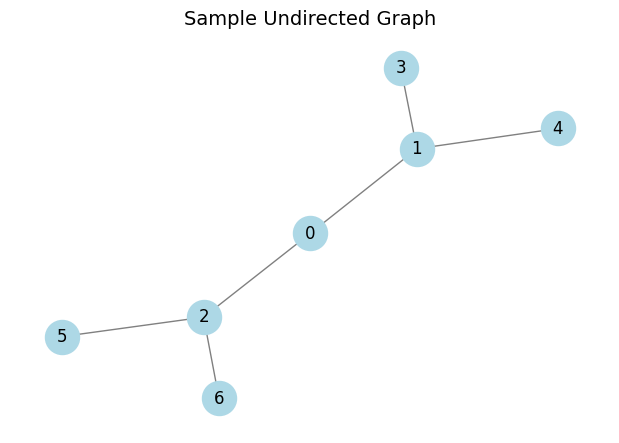

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample undirected graph
G = nx.Graph()
edges = [(0,1),(0,2),(1,3),(1,4),(2,5),(2,6)]
G.add_edges_from(edges)

# Layout for consistent positioning
pos = nx.spring_layout(G, seed=42)

# Plot original graph
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600, edge_color='gray')
plt.title("Sample Undirected Graph", fontsize=14)
plt.show()


## 2. Breadth-First Search (BFS)

**Concept**: Explore nodes layer-by-layer from the source.  
**Visualization**: Nodes colored by their distance (layer) from the start node.

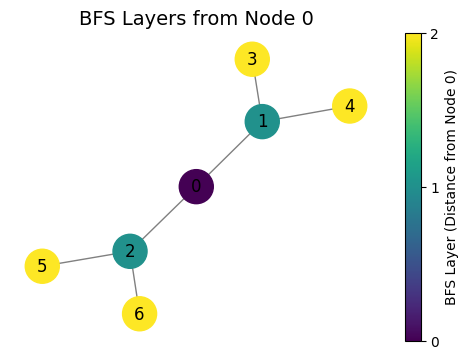

In [5]:
from collections import deque
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assume G and pos are already defined (as in your setup cell)

# 1. BFS to compute layer (distance) from start
start = 0
visited = {start}
dist = {start: 0}
queue = deque([start])

while queue:
    u = queue.popleft()
    for v in G.neighbors(u):
        if v not in visited:
            visited.add(v)
            dist[v] = dist[u] + 1
            queue.append(v)

# 2. Prepare colors by layer
layers = sorted(set(dist.values()))
colors = [dist[node] for node in G.nodes()]

# 3. Draw graph with node colors
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(
    G, pos, ax=ax,
    with_labels=True,
    node_color=colors,
    cmap=plt.cm.viridis,
    node_size=600,
    edge_color='gray'
)

# 4. Create and attach colorbar properly
norm = mpl.colors.Normalize(vmin=min(layers), vmax=max(layers))
sm = mpl.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])  # Dummy array for the colorbar
cbar = fig.colorbar(sm, ax=ax, ticks=layers)
cbar.set_label('BFS Layer (Distance from Node 0)')

# 5. Title and show
ax.set_title("BFS Layers from Node 0", fontsize=14)
plt.show()


## 3. Depth-First Search (DFS)

**Concept**: Explore as far as possible along each branch before backtracking.  
**Visualization**: Nodes colored by discovery order.

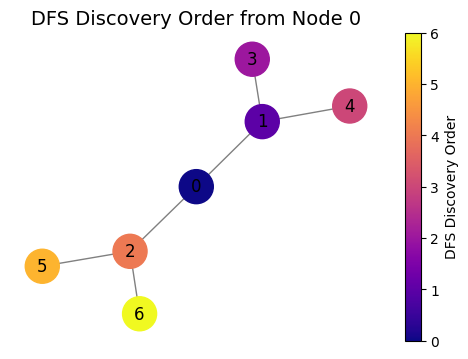

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming G and pos are defined as in previous cells
G = nx.Graph()
edges = [(0,1),(0,2),(1,3),(1,4),(2,5),(2,6)]
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)
start = 0

# DFS to record discovery order
order = []
visited = set()
def dfs(u):
    visited.add(u)
    order.append(u)
    for v in G.neighbors(u):
        if v not in visited:
            dfs(v)
dfs(start)

# Map discovery index to nodes
disc_index = {node: idx for idx, node in enumerate(order)}
colors = [disc_index[node] for node in G.nodes()]

# Plot with proper colorbar setup
fig, ax = plt.subplots(figsize=(6, 4))
nodes = nx.draw(
    G, pos, ax=ax,
    with_labels=True,
    node_color=colors,
    cmap=plt.cm.plasma,
    node_size=600,
    edge_color='gray'
)

# Create a ScalarMappable and colorbar
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.plasma,
    norm=plt.Normalize(vmin=0, vmax=len(order)-1)
)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, ticks=range(len(order)))
cbar.set_label('DFS Discovery Order')

ax.set_title("DFS Discovery Order from Node 0", fontsize=14)
plt.show()
